<a href="https://colab.research.google.com/github/charitha05/FinalYearProject/blob/main/S%26P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/final_year_project/all_stocks_5yr.csv")

In [4]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
data=data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


In [8]:
data['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [9]:
data['Name'].nunique()

505

In [10]:
data['date'].unique()

array(['08-02-2013', '11-02-2013', '12-02-2013', ..., '05-02-2018',
       '06-02-2018', '07-02-2018'], dtype=object)

In [11]:
data[data['date']=='2013-11-08']['Name']

Series([], Name: Name, dtype: object)

<ipython-input-12-e080b6e46497>:60: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['date'])


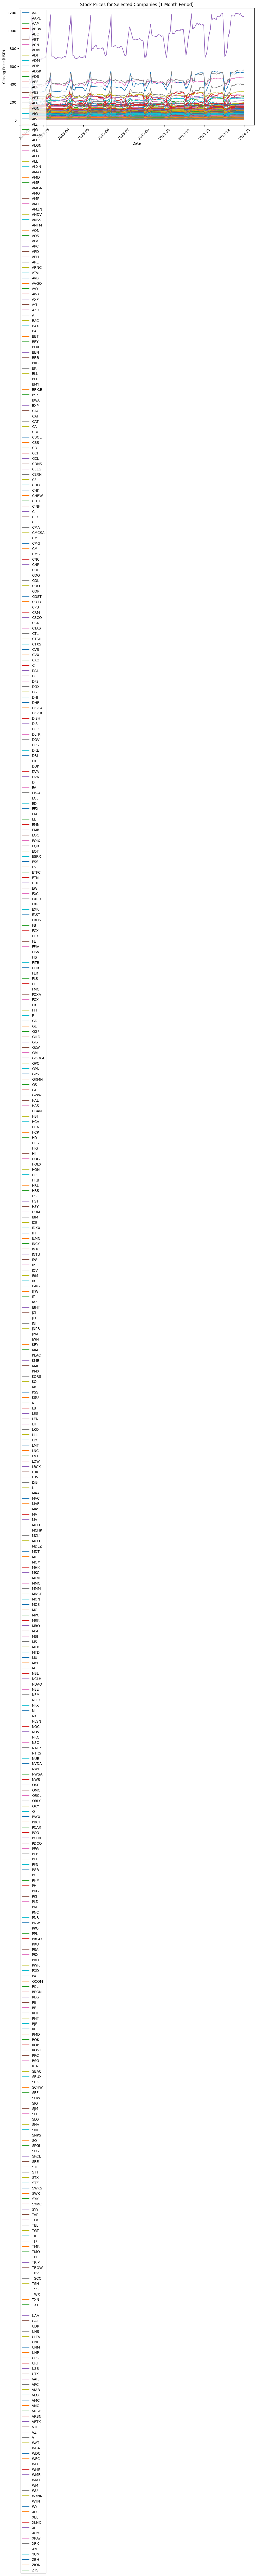

In [12]:
# List of specified companies
companies_to_plot = ['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX',
       'CXO', 'C', 'DAL', 'DE', 'DFS', 'DGX', 'DG', 'DHI', 'DHR', 'DISCA',
       'DISCK', 'DISH', 'DIS', 'DLR', 'DLTR', 'DOV', 'DPS', 'DRE', 'DRI',
       'DTE', 'DUK', 'DVA', 'DVN', 'DWDP', 'DXC', 'D', 'EA', 'EBAY',
       'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX',
       'EQR', 'EQT', 'ESRX', 'ESS', 'ES', 'ETFC', 'ETN', 'ETR', 'EVHC',
       'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'FAST', 'FBHS', 'FB', 'FCX',
       'FDX', 'FE', 'FFIV', 'FISV', 'FIS', 'FITB', 'FLIR', 'FLR', 'FLS',
       'FL', 'FMC', 'FOXA', 'FOX', 'FRT', 'FTI', 'FTV', 'F', 'GD', 'GE',
       'GGP', 'GILD', 'GIS', 'GLW', 'GM', 'GOOGL', 'GOOG', 'GPC', 'GPN',
       'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI',
       'HCA', 'HCN', 'HCP', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOG',
       'HOLX', 'HON', 'HPE', 'HPQ', 'HP', 'HRB', 'HRL', 'HRS', 'HSIC',
       'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY',
       'INFO', 'INTC', 'INTU', 'IPG', 'IP', 'IQV', 'IRM', 'IR', 'ISRG',
       'ITW', 'IT', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM',
       'JWN', 'KEY', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KORS',
       'KO', 'KR', 'KSS', 'KSU', 'K', 'LB', 'LEG', 'LEN', 'LH', 'LKQ',
       'LLL', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUK', 'LUV',
       'LYB', 'L', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MA', 'MCD', 'MCHP',
       'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM',
       'MMC', 'MMM', 'MNST', 'MON', 'MOS', 'MO', 'MPC', 'MRK', 'MRO',
       'MSFT', 'MSI', 'MS', 'MTB', 'MTD', 'MU', 'MYL', 'M', 'NAVI', 'NBL',
       'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NFX', 'NI', 'NKE', 'NLSN',
       'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL',
       'NWSA', 'NWS', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'O', 'PAYX',
       'PBCT', 'PCAR', 'PCG', 'PCLN', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG',
       'PGR', 'PG', 'PHM', 'PH', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR',
       'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR',
       'PXD', 'PX', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'REGN', 'REG', 'RE',
       'RF', 'RHI', 'RHT', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST',
       'RRC', 'RSG', 'RTN', 'SBAC', 'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW',
       'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNI', 'SNPS', 'SO', 'SPGI',
       'SPG', 'SRCL', 'SRE', 'STI', 'STT', 'STX', 'STZ', 'SWKS', 'SWK',
       'SYF', 'SYK', 'SYMC', 'SYY', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF',
       'TJX', 'TMK', 'TMO', 'TPR', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN',
       'TSS', 'TWX', 'TXN', 'TXT', 'T', 'UAA', 'UAL', 'UA', 'UDR', 'UHS',
       'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'UTX', 'VAR',
       'VFC', 'VIAB', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR',
       'VZ', 'V', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WLTW', 'WMB',
       'WMT', 'WM', 'WRK', 'WU', 'WYNN', 'WYN', 'WY', 'XEC', 'XEL',
       'XLNX', 'XL', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS']

# Convert the 'Date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Define the time period (e.g., 1 month)
start_date = '2013-02-08'
end_date = '2013-12-31'  # Adjust the end date as needed

# Filter data for the specified time period
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Create a single visualization for comparative analysis
plt.figure(figsize=(12, 6))
plt.title(f"Stock Prices for Selected Companies (1-Month Period)")
for company in companies_to_plot:
    subset = filtered_data[filtered_data['Name'] == company]
    sns.lineplot(x='date', y='close', data=subset, label=company)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(loc='upper left')
plt.show()


In [13]:

# List of specified companies
companies_to_plot = ['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX',
       'CXO', 'C', 'DAL', 'DE', 'DFS', 'DGX', 'DG', 'DHI', 'DHR', 'DISCA',
       'DISCK', 'DISH', 'DIS', 'DLR', 'DLTR', 'DOV', 'DPS', 'DRE', 'DRI',
       'DTE', 'DUK', 'DVA', 'DVN', 'DWDP', 'DXC', 'D', 'EA', 'EBAY',
       'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX',
       'EQR', 'EQT', 'ESRX', 'ESS', 'ES', 'ETFC', 'ETN', 'ETR', 'EVHC',
       'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'FAST', 'FBHS', 'FB', 'FCX',
       'FDX', 'FE', 'FFIV', 'FISV', 'FIS', 'FITB', 'FLIR', 'FLR', 'FLS',
       'FL', 'FMC', 'FOXA', 'FOX', 'FRT', 'FTI', 'FTV', 'F', 'GD', 'GE',
       'GGP', 'GILD', 'GIS', 'GLW', 'GM', 'GOOGL', 'GOOG', 'GPC', 'GPN',
       'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI',
       'HCA', 'HCN', 'HCP', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOG',
       'HOLX', 'HON', 'HPE', 'HPQ', 'HP', 'HRB', 'HRL', 'HRS', 'HSIC',
       'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY',
       'INFO', 'INTC', 'INTU', 'IPG', 'IP', 'IQV', 'IRM', 'IR', 'ISRG',
       'ITW', 'IT', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM',
       'JWN', 'KEY', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KORS',
       'KO', 'KR', 'KSS', 'KSU', 'K', 'LB', 'LEG', 'LEN', 'LH', 'LKQ',
       'LLL', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUK', 'LUV',
       'LYB', 'L', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MA', 'MCD', 'MCHP',
       'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM',
       'MMC', 'MMM', 'MNST', 'MON', 'MOS', 'MO', 'MPC', 'MRK', 'MRO',
       'MSFT', 'MSI', 'MS', 'MTB', 'MTD', 'MU', 'MYL', 'M', 'NAVI', 'NBL',
       'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NFX', 'NI', 'NKE', 'NLSN',
       'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL',
       'NWSA', 'NWS', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'O', 'PAYX',
       'PBCT', 'PCAR', 'PCG', 'PCLN', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG',
       'PGR', 'PG', 'PHM', 'PH', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR',
       'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR',
       'PXD', 'PX', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'REGN', 'REG', 'RE',
       'RF', 'RHI', 'RHT', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST',
       'RRC', 'RSG', 'RTN', 'SBAC', 'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW',
       'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNI', 'SNPS', 'SO', 'SPGI',
       'SPG', 'SRCL', 'SRE', 'STI', 'STT', 'STX', 'STZ', 'SWKS', 'SWK',
       'SYF', 'SYK', 'SYMC', 'SYY', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF',
       'TJX', 'TMK', 'TMO', 'TPR', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN',
       'TSS', 'TWX', 'TXN', 'TXT', 'T', 'UAA', 'UAL', 'UA', 'UDR', 'UHS',
       'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'UTX', 'VAR',
       'VFC', 'VIAB', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR',
       'VZ', 'V', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WLTW', 'WMB',
       'WMT', 'WM', 'WRK', 'WU', 'WYNN', 'WYN', 'WY', 'XEC', 'XEL',
       'XLNX', 'XL', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS']
# Define the desired year
desired_year = 2013

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract year and week information from the 'date' column
data['year'] = data['date'].dt.year
data['week'] = data['date'].dt.strftime('%U')


# Filter the data for the desired year and create weekly data
filtered_data = data[(data['year'] == desired_year) & (data['week'] == '30')].copy()
print(filtered_data)
#print(type(data['week']))
# file_path = 'sampl.xlsx'

# # Use the to_excel function to save the DataFrame to an Excel file
# filtered_data.to_excel(file_path, index=False)

             date   open   high    low  close    volume Name  year week
0      2013-08-02  15.07  15.12  14.63  14.75   8407500  AAL  2013   30
19     2013-08-03  14.99  15.20  14.84  14.92  10593700  AAL  2013   30
117    2013-07-29  19.07  19.26  18.93  19.23   6462700  AAL  2013   30
118    2013-07-30  19.33  19.45  19.11  19.20   6091900  AAL  2013   30
119    2013-07-31  19.25  19.49  19.19  19.35   9571100  AAL  2013   30
...           ...    ...    ...    ...    ...       ...  ...   ...  ...
617781 2013-08-02  32.31  33.48  32.30  33.05   2599232  ZTS  2013   30
617800 2013-08-03  34.03  34.69  33.80  34.09   1541064  ZTS  2013   30
617898 2013-07-29  30.27  30.54  29.98  30.09   4123553  ZTS  2013   30
617899 2013-07-30  30.15  30.32  29.89  30.04   4630067  ZTS  2013   30
617900 2013-07-31  30.00  30.19  29.80  29.81   5382355  ZTS  2013   30

[2398 rows x 9 columns]


autocorrelation

In [14]:
autocorrelation_table = []

for i in range(1, 53):
    # Filter the data for the desired week and year
    filtered_data_by_week = data[(data['year'] == 2013) & (data['week'] == str(i))].copy()

    # Pivot the data to create a correlation matrix
    pivot_table = filtered_data_by_week.pivot_table(index='date', columns='Name', values='close')

    # Calculate the autocorrelation for each company
    autocorrelation = pivot_table.apply(lambda col: col.autocorr())
    autocorrelation_table.append(autocorrelation)

    print(f'Week {i} Autocorrelation:')
    print(autocorrelation)

Week 1 Autocorrelation:
Series([], dtype: float64)
Week 2 Autocorrelation:
Series([], dtype: float64)
Week 3 Autocorrelation:
Series([], dtype: float64)
Week 4 Autocorrelation:
Series([], dtype: float64)
Week 5 Autocorrelation:
Series([], dtype: float64)
Week 6 Autocorrelation:
Series([], dtype: float64)
Week 7 Autocorrelation:
Series([], dtype: float64)
Week 8 Autocorrelation:
Series([], dtype: float64)
Week 9 Autocorrelation:
Series([], dtype: float64)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Week 10 Autocorrelation:
Name
A       0.434999
AAL     0.329544
AAP    -0.209934
AAPL   -0.007894
ABBV    0.288379
          ...   
XYL    -0.506984
YUM    -0.302012
ZBH     0.249143
ZION    0.093779
ZTS     0.434088
Length: 483, dtype: float64
Week 11 Autocorrelation:
Name
A       0.119541
AAL     0.349040
AAP     0.205592
AAPL   -0.285765
ABBV   -0.140622
          ...   
XYL    -0.650734
YUM     0.384429
ZBH    -0.741548
ZION   -0.214865
ZTS     0.223622
Length: 476, dtype: float64
Week 12 Autocorrelation:
Name
A       0.741348
AAL     0.549949
AAP     0.555520
AAPL    0.952592
ABBV    0.368007
          ...   
XYL    -0.116828
YUM     0.895183
ZBH     0.513195
ZION    0.547533
ZTS     0.996527
Length: 476, dtype: float64
Week 13 Autocorrelation:
Name
A      -1.0
AAL     1.0
AAP    -1.0
AAPL    1.0
ABBV    1.0
       ... 
XYL     1.0
YUM     1.0
ZBH     1.0
ZION   -1.0
ZTS    -1.0
Length: 477, dtype: float64
Week 14 Autocorrelation:
Name
A       0.155152
AAL     0.720710
AAP     0.8

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Week 22 Autocorrelation:
Name
A       0.349452
AAL     0.236271
AAP    -0.978499
AAPL   -0.863742
ABBV   -0.454303
          ...   
XYL     0.581849
YUM     0.987535
ZBH     0.930880
ZION    0.999975
ZTS     0.998987
Length: 482, dtype: float64
Week 23 Autocorrelation:
Name
A       0.080487
AAL    -0.011383
AAP    -0.072896
AAPL    0.205783
ABBV   -0.037647
          ...   
XYL    -0.069622
YUM    -0.076476
ZBH     0.060335
ZION    0.287153
ZTS    -0.046641
Length: 483, dtype: float64
Week 24 Autocorrelation:
Name
A       0.537567
AAL     0.656121
AAP     0.213914
AAPL    0.889400
ABBV    0.028209
          ...   
XYL     0.710180
YUM     0.704036
ZBH     0.660645
ZION    0.266041
ZTS     0.248506
Length: 482, dtype: float64
Week 25 Autocorrelation:
Name
A       0.086043
AAL    -0.735284
AAP    -0.466412
AAPL    0.606830
ABBV   -0.147925
          ...   
XYL     0.928491
YUM     0.752005
ZBH     0.728193
ZION    0.760275
ZTS    -0.710372
Length: 482, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Week 26 Autocorrelation:
Name
A      -1.0
AAL     1.0
AAP    -1.0
AAPL   -1.0
ABBV   -1.0
       ... 
XYL     1.0
YUM     1.0
ZBH     1.0
ZION    1.0
ZTS     1.0
Length: 477, dtype: float64
Week 27 Autocorrelation:
Name
A      -1.0
AAL     1.0
AAP    -1.0
AAPL    1.0
ABBV    1.0
       ... 
XYL     1.0
YUM     1.0
ZBH     1.0
ZION   -1.0
ZTS    -1.0
Length: 482, dtype: float64
Week 28 Autocorrelation:
Name
A      -0.003025
AAL     0.517688
AAP    -0.069683
AAPL   -0.555453
ABBV   -0.182399
          ...   
XYL    -0.389380
YUM     0.141189
ZBH     0.905642
ZION    0.130659
ZTS     0.865324
Length: 482, dtype: float64
Week 29 Autocorrelation:
Name
A      -0.133627
AAL     0.851720
AAP    -0.102213
AAPL    0.269521
ABBV    0.010524
          ...   
XYL    -0.463801
YUM     0.586595
ZBH    -0.171140
ZION    0.375648
ZTS     0.046957
Length: 482, dtype: float64
Week 30 Autocorrelation:
Name
A      -0.249990
AAL     0.531065
AAP     0.760014
AAPL   -0.749939
ABBV    0.439515
          ...  

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Week 35 Autocorrelation:
Name
A       1.0
AAL    -1.0
AAP    -1.0
AAPL   -1.0
ABBV   -1.0
       ... 
XYL    -1.0
YUM     1.0
ZBH    -1.0
ZION    1.0
ZTS    -1.0
Length: 482, dtype: float64
Week 36 Autocorrelation:
Name
A       0.002606
AAL    -0.199626
AAP    -0.392966
AAPL   -0.594525
ABBV   -0.264282
          ...   
XYL    -0.161507
YUM    -0.292670
ZBH    -0.166937
ZION   -0.378831
ZTS     0.104315
Length: 483, dtype: float64
Week 37 Autocorrelation:
Name
A       0.921464
AAL     0.470540
AAP     0.876788
AAPL    0.763539
ABBV    0.056419
          ...   
XYL    -0.016225
YUM    -0.052294
ZBH     0.147660
ZION    0.764235
ZTS     0.095597
Length: 482, dtype: float64
Week 38 Autocorrelation:
Name
A      -0.140542
AAL     0.192086
AAP     0.831243
AAPL    0.064712
ABBV    0.961979
          ...   
XYL     0.661346
YUM    -0.402239
ZBH     0.342207
ZION    0.455402
ZTS    -0.592347
Length: 482, dtype: float64
Week 39 Autocorrelation:
Name
A      -1.0
AAL    -1.0
AAP    -1.0
AAPL   -1

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Week 44 Autocorrelation:
Name
A       0.957863
AAL     0.999492
AAP    -0.494490
AAPL   -0.972122
ABBV    0.654455
          ...   
XYL    -0.708243
YUM     0.499743
ZBH     0.953392
ZION    0.663853
ZTS     0.858000
Length: 482, dtype: float64
Week 45 Autocorrelation:
Name
A      -0.455359
AAL    -0.010214
AAP     0.125816
AAPL   -0.104892
ABBV   -0.119920
          ...   
XYL     0.041176
YUM     0.943152
ZBH     0.683321
ZION   -0.468441
ZTS     0.009533
Length: 483, dtype: float64
Week 46 Autocorrelation:
Name
A      -0.405586
AAL     0.122008
AAP     0.467961
AAPL   -0.453350
ABBV   -0.007452
          ...   
XYL     0.903139
YUM     0.514342
ZBH     0.259402
ZION    0.313464
ZTS    -0.580272
Length: 483, dtype: float64
Week 47 Autocorrelation:
Name
A      -0.029747
AAL    -0.218863
AAP    -0.252361
AAPL    0.990558
ABBV   -0.609427
          ...   
XYL    -0.439602
YUM     0.057639
ZBH     0.535544
ZION   -0.779057
ZTS     0.042669
Length: 483, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Week 48 Autocorrelation:
Name
A      -0.533105
AAL     0.984656
AAP     0.487476
AAPL   -0.278829
ABBV    0.754656
          ...   
XYL    -0.707007
YUM     0.316920
ZBH     0.629959
ZION    0.668940
ZTS     0.775180
Length: 482, dtype: float64
Week 49 Autocorrelation:
Name
A       0.891454
AAL     0.693987
AAP     0.765879
AAPL    0.810096
ABBV    0.773787
          ...   
XYL     0.691418
YUM     0.837027
ZBH     0.588835
ZION    0.699646
ZTS     0.120702
Length: 483, dtype: float64
Week 50 Autocorrelation:
Name
A       0.458946
AAL    -0.732177
AAP    -0.998632
AAPL    0.588708
ABBV    0.089899
          ...   
XYL    -0.121715
YUM    -0.407917
ZBH     0.586756
ZION    0.462503
ZTS     0.324476
Length: 483, dtype: float64
Week 51 Autocorrelation:
Name
A      -0.901127
AAL     0.763245
AAP    -0.551175
AAPL    0.992550
ABBV   -0.545031
          ...   
XYL     0.391655
YUM    -0.523391
ZBH    -0.906303
ZION   -0.500000
ZTS     0.706129
Length: 483, dtype: float64
Week 52 Autocorrelat

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [15]:
correlation_matrix = []
correlation_table = []
companies_week = []  # Initialize a list to store company names for each week

for i in range(1, 53):
    #desired_weeks = [str(week) for week in range(1, 53)]

    # Filter the data for the desired weeks
    filtered_data_by_week = data[(data['year'] == 2013) & (data['week'] == str(i))].copy()

    # Print the filtered data including the 'Name' column
    #print(filtered_data_by_week[['Name', 'week']])
    #companies_week.append(data['Name'])
    # Store the names of companies for the current week
    companies_week.append(filtered_data_by_week['Name'].unique().tolist())

    # Pivot the data to create a correlation matrix
    correlation_table.append(filtered_data_by_week.pivot_table(index='date', columns='Name', values='close'))

    # Calculate the correlation matrix
    correlation_matrix=(correlation_table[i - 1].corr())
    print(correlation_matrix, 'week', i,'companies',companies_week[i-1])

# Print the correlation table
# print(correlation_matrix)


Empty DataFrame
Columns: []
Index: [] week 1 companies []
Empty DataFrame
Columns: []
Index: [] week 2 companies []
Empty DataFrame
Columns: []
Index: [] week 3 companies []
Empty DataFrame
Columns: []
Index: [] week 4 companies []
Empty DataFrame
Columns: []
Index: [] week 5 companies []
Empty DataFrame
Columns: []
Index: [] week 6 companies []
Empty DataFrame
Columns: []
Index: [] week 7 companies []
Empty DataFrame
Columns: []
Index: [] week 8 companies []
Empty DataFrame
Columns: []
Index: [] week 9 companies []
Name         A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
Name                                                                         
A     1.000000  0.995827  0.784808  0.915300  0.989776  0.980098  0.359509   
AAL   0.995827  1.000000  0.835857  0.946318  0.995327  0.993676  0.439659   
AAP   0.784808  0.835857  1.000000  0.963059  0.848702  0.891843  0.824738   
AAPL  0.915300  0.946318  0.963059  1.000000  0.957955  0.974639  0.656090   
ABBV  0.98

In [16]:
autocorrelation_table[9]

Name
A       0.434999
AAL     0.329544
AAP    -0.209934
AAPL   -0.007894
ABBV    0.288379
          ...   
XYL    -0.506984
YUM    -0.302012
ZBH     0.249143
ZION    0.093779
ZTS     0.434088
Length: 483, dtype: float64

In [17]:
correlation_matrix=(correlation_table[9].corr())
print(correlation_matrix)

Name         A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
Name                                                                         
A     1.000000  0.995827  0.784808  0.915300  0.989776  0.980098  0.359509   
AAL   0.995827  1.000000  0.835857  0.946318  0.995327  0.993676  0.439659   
AAP   0.784808  0.835857  1.000000  0.963059  0.848702  0.891843  0.824738   
AAPL  0.915300  0.946318  0.963059  1.000000  0.957955  0.974639  0.656090   
ABBV  0.989776  0.995327  0.848702  0.957955  1.000000  0.992078  0.432842   
...        ...       ...       ...       ...       ...       ...       ...   
XYL   0.595321  0.664897  0.962235  0.863637  0.683049  0.742272  0.920315   
YUM   0.780034  0.832663  0.993628  0.964246  0.848728  0.886535  0.812475   
ZBH   0.955427  0.974652  0.918121  0.972583  0.968468  0.990882  0.606099   
ZION  0.948152  0.972909  0.937711  0.989604  0.971595  0.991999  0.631227   
ZTS  -0.955152 -0.944370 -0.745117 -0.882633 -0.962914 -0.930133

In [18]:
print(correlation_matrix['ADM']['ADBE'])

0.9880734422394075


In [19]:
print(correlation_matrix['A'])
print(correlation_matrix['A'][0])

Name
A       1.000000
AAL     0.995827
AAP     0.784808
AAPL    0.915300
ABBV    0.989776
          ...   
XYL     0.595321
YUM     0.780034
ZBH     0.955427
ZION    0.948152
ZTS    -0.955152
Name: A, Length: 483, dtype: float64
1.0


In [20]:
d={'Names':companies_to_plot}
df = pd.DataFrame(d)
print(df)
# write the DataFrame to a CSV file
#df.to_csv('Stocks_node.csv')

    Names
0     AAL
1    AAPL
2     AAP
3    ABBV
4     ABC
..    ...
500   XYL
501   YUM
502   ZBH
503  ZION
504   ZTS

[505 rows x 1 columns]


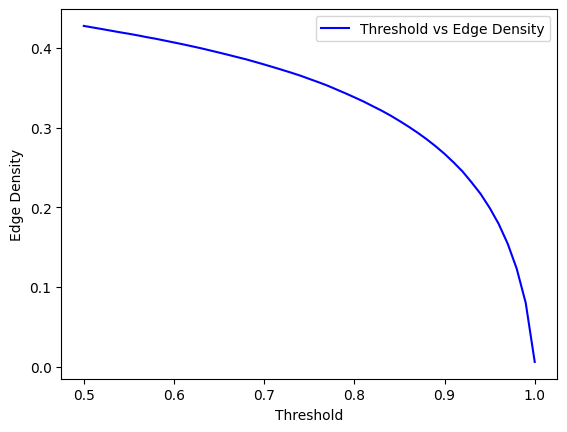

In [35]:
# Set the threshold value
data2=[]
data1=[]
start = 0.5
end = 1.0
step = 0.01

for t in np.arange(start, end + step, step):
  data1.append(t)
  threshold = t

  # Get the company names from the column names of the correlation matrix
  company_names = correlation_matrix.columns.tolist()

  # Create an empty list to store the edges
  edges = []

  # Iterate over the correlation matrix and extract the edges based on the threshold
  for i in range(len(company_names)):
      for j in range(i + 1, len(company_names)):
          from_edge = company_names[i]
          to_edge = company_names[j]
          weight = correlation_matrix.iloc[i, j]
          if abs(weight) >= threshold:
              edges.append([from_edge, to_edge, weight])
  x= len(edges)/(483*482)
  data2.append(x)
plt.plot(data1, data2, label='Threshold vs Edge Density', color='blue')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Edge Density')

# Add a legend
plt.legend()
plt.show()

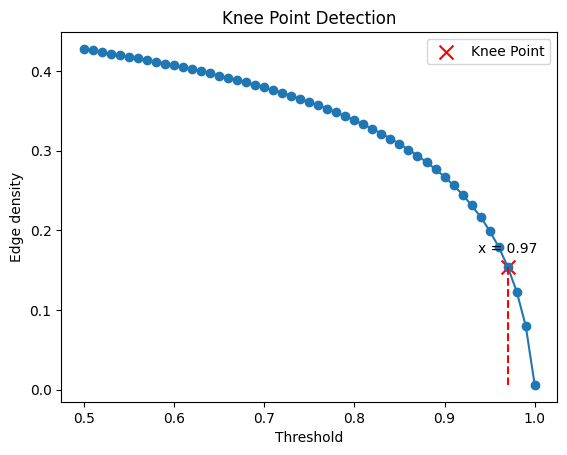

The knee point is at x = 0.9700000000000004


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Generate example data (you should replace this with your own data)
x = data1
y = data2

# Calculate the pairwise Euclidean distances between data points
distances = [distance.euclidean([x[i-1], y[i-1]], [x[i], y[i]]) for i in range(1, len(x))]

# Calculate the second derivative of the distances
second_derivative = np.diff(np.diff(distances))

# Find the index with the maximum change in the second derivative
max_change_index = np.argmax(second_derivative)

# Get the x-axis value corresponding to the maximum change
knee_x = x[max_change_index]
knee_y = y[max_change_index]

# Plot the data
plt.plot(x, y, marker='o')
plt.xlabel("Threshold")
plt.ylabel("Edge density")
plt.title("Knee Point Detection")

# Plot the knee point on the graph
plt.scatter(knee_x, knee_y, color='red', marker='x', s=100, label='Knee Point')

# Draw a line from the knee point to the bottom of the plot
plt.plot([knee_x, knee_x], [knee_y, min(y)], linestyle='--', color='red')

# Specify the x-axis value of the knee point
plt.annotate(f'x = {knee_x:.2f}', (knee_x, knee_y), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the plot
plt.legend()
plt.show()

print("The knee point is at x =", knee_x)


In [25]:
# Set the threshold value
threshold = 0.95

  # Get the company names from the column names of the correlation matrix
company_names = correlation_matrix.columns.tolist()

  # Create an empty list to store the edges
edges = []

  # Iterate over the correlation matrix and extract the edges based on the threshold
for i in range(len(company_names)):
  for j in range(i + 1, len(company_names)):
    from_edge = company_names[i]
    to_edge = company_names[j]
    weight = correlation_matrix.iloc[i, j]
    if abs(weight) >= threshold:
      edges.append([from_edge, to_edge, weight])
# Create a DataFrame from the edges list
edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

# Export the edge list as a CSV file
edge_list.to_csv('corr_95_edge_list.csv', index=False)

In [28]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Set the threshold value
threshold = 0.95

# Get the company names from the column names of the correlation matrix
company_names = correlation_matrix.columns.tolist()

# Create a graph from the correlation matrix
G = nx.Graph()
G.add_nodes_from(company_names)

# Iterate over the correlation matrix and add edges based on the threshold
for i in range(len(company_names)):
    for j in range(i + 1, len(company_names)):
        from_edge = company_names[i]
        to_edge = company_names[j]
        weight = correlation_matrix.iloc[i, j]
        if abs(weight) >= threshold:
            G.add_edge(from_edge, to_edge, weight=weight)

# Find communities using Louvain method
communities = list(greedy_modularity_communities(G))

# Calculate modularity
modularity = nx.community.modularity(G, communities)
print("Modularity:", modularity)

# If you want to print the communities:
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {list(community)}")


Modularity: 0.14088200315910449
Community 1: ['RHI', 'SPG', 'CAT', 'SJM', 'SNPS', 'FOXA', 'COG', 'ROST', 'LH', 'GRMN', 'MAA', 'MCD', 'DGX', 'ABT', 'MTD', 'AVGO', 'GPS', 'SNA', 'IP', 'APA', 'AMGN', 'RF', 'CNC', 'UNP', 'KMI', 'UNH', 'ORLY', 'LOW', 'BBY', 'CSCO', 'RL', 'CBS', 'EXPE', 'VMC', 'CBG', 'ARNC', 'GWW', 'EQIX', 'IPG', 'IR', 'HRB', 'KO', 'RHT', 'PKI', 'KR', 'SHW', 'TEL', 'CHTR', 'APD', 'ACN', 'DRE', 'HCA', 'CAG', 'ALGN', 'F', 'NTRS', 'NFLX', 'DUK', 'ANDV', 'TROW', 'COF', 'TRIP', 'FTI', 'HOG', 'ROK', 'CVX', 'EIX', 'TXT', 'PXD', 'SWK', 'RJF', 'SLB', 'PBCT', 'WAT', 'ALB', 'SCG', 'NFX', 'TXN', 'SPGI', 'EBAY', 'HD', 'CF', 'XOM', 'NEM', 'PPL', 'RMD', 'NBL', 'APC', 'A', 'NWS', 'VIAB', 'FB', 'XLNX', 'ITW', 'NVDA', 'TSS', 'AMT', 'BSX', 'JBHT', 'LKQ', 'LEG', 'MOS', 'LMT', 'CELG', 'TMK', 'LB', 'SYY', 'PGR', 'ALXN', 'COO', 'MTB', 'DAL', 'EMN', 'HBI', 'EMR', 'L', 'MRK', 'XRX', 'HUM', 'VLO', 'GD', 'PCLN', 'TGT', 'DTE', 'AFL', 'D', 'DG', 'DOV', 'VZ', 'INCY', 'COP', 'NOV', 'IDXX', 'CRM', 'MPC', '

In [47]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Set the threshold value
threshold = 0.95

# Get the company names from the column names of the correlation matrix
company_names = correlation_matrix.columns.tolist()

# Create a graph from the correlation matrix
G = nx.Graph()
G.add_nodes_from(company_names)

# Create a dictionary to map nodes to their communities
community_dict = {}

# Iterate over the correlation matrix and add edges based on the threshold
for i in range(len(company_names)):
    for j in range(i + 1, len(company_names)):
        from_edge = company_names[i]
        to_edge = company_names[j]
        weight = correlation_matrix.iloc[i, j]
        if abs(weight) >= threshold:
            G.add_edge(from_edge, to_edge, weight=weight)

# Find communities using Louvain method
communities = list(greedy_modularity_communities(G))

# Add nodes and community numbers to the community dictionary
for i, community in enumerate(communities):
    for node in community:
        community_dict[node] = i + 1  # Community numbers start from 1

# Calculate modularity
modularity = nx.community.modularity(G, communities)
print("Modularity:", modularity)



Modularity: 0.14088200315910449


In [ ]:

# Create an empty list to store the edges
edges = []

# Iterate over the edges and create a list of edges with a single community number column
for edge in G.edges(data=True):
    from_edge, to_edge, data = edge
    weight = data.get('weight', None)
    community = community_dict[from_edge]
    edges.append([from_edge, to_edge, weight, community])

# Create a DataFrame from the edges list
edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight', 'Community'])

# Export the edge list as a CSV file
edge_list.to_csv('corr_95_edge_list.csv', index=False)

In [48]:
# Print the communities:
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {len(community)}")

Community 1: 271
Community 2: 211
Community 3: 1


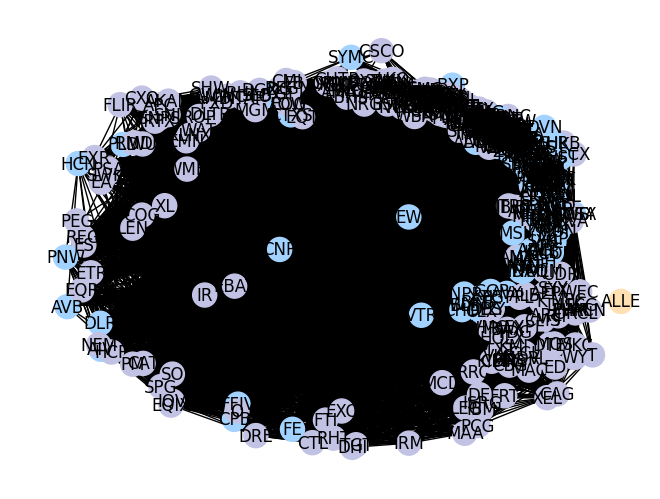

In [53]:
# Define a palette of light colors
light_colors = ['#FFDDC1', '#C2C2E5', '#A2D2FF', '#FFE0B2', '#B2E5E2', '#FFB2CC']

# Create a list of community colors for each node
node_colors = [light_colors[community_dict[node] % len(light_colors)] for node in G.nodes()]

# Draw the graph with nodes colored by community
pos = nx.spring_layout(G)  # You can choose a different layout if preferred
nx.draw(G, pos, node_color=node_colors, with_labels=True)

# Show the plot
plt.show()

In [54]:
# Find communities within Community 1
community_1 = list(communities[0])  # Assuming Community 1 is the largest community

# Create a subgraph for Community 1
subgraph1 = G.subgraph(community_1)

# Find sub-communities within Community 1 using Louvain method
sub_communities1 = list(greedy_modularity_communities(subgraph1))

# Print the number of sub-communities within Community 1
print(f"Number of Sub-Communities within Community 1: {len(sub_communities1)}")

# If you want to print the sub-communities within Community 1:
for i, sub_community in enumerate(sub_communities1):
    print("length of sub-comminity:",len(sub_community))
    print(f"Sub-Community {i + 1} within Community 1: {list(sub_community)}")

Number of Sub-Communities within Community 1: 2
length of sub-comminity: 152
Sub-Community 1 within Community 1: ['DFS', 'SPG', 'SJM', 'CAT', 'CHK', 'NRG', 'SRE', 'ROST', 'LH', 'GRMN', 'MAA', 'MTD', 'AVGO', 'GPS', 'SNA', 'AMGN', 'AYI', 'APA', 'RF', 'MCO', 'UNP', 'KMI', 'ORLY', 'UNH', 'DHI', 'EXC', 'UHS', 'BBY', 'AGN', 'TSCO', 'OXY', 'ARE', 'CBS', 'JEC', 'V', 'ABBV', 'LEN', 'PM', 'FBHS', 'AMAT', 'ANSS', 'IPG', 'EQIX', 'UAA', 'VRSK', 'EXPD', 'STX', 'SIG', 'IBM', 'KR', 'TEL', 'ECL', 'CHTR', 'APD', 'BRK.B', 'DRE', 'AJG', 'HCA', 'ALGN', 'AAL', 'NFLX', 'CI', 'KLAC', 'KMX', 'COF', 'TRIP', 'HOG', 'NI', 'ROK', 'ES', 'MU', 'PNR', 'O', 'EIX', 'XEC', 'HES', 'MLM', 'ZTS', 'PBCT', 'PKG', 'TWX', 'BBT', 'ULTA', 'NFX', 'HRS', 'ANTM', 'ATVI', 'TXN', 'SPGI', 'HD', 'AET', 'BWA', 'CF', 'NEM', 'NBL', 'A', 'CTL', 'VIAB', 'PCAR', 'ITW', 'LRCX', 'NVDA', 'TSS', 'BSX', 'CERN', 'LKQ', 'LEG', 'RE', 'HCP', 'LMT', 'CELG', 'TMK', 'LB', 'PGR', 'ALXN', 'COO', 'MTB', 'DAL', 'NKE', 'AIG', 'HBI', 'EMR', 'EQR', 'L', 'MRK',

for community 1

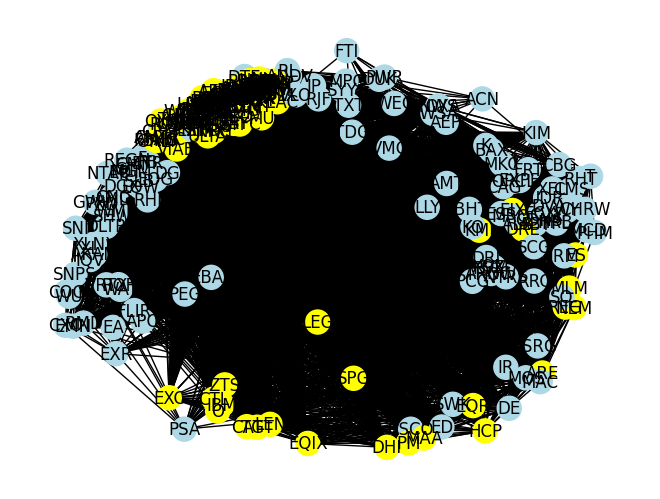

In [59]:
# Create a color map to differentiate communities
color_map = {}
for i, sub_community in enumerate(sub_communities1):
    for node in sub_community:
        color_map[node] = i

# Define colors for yellow and light blue
colors = ['#FFFF00', '#ADD8E6']  # Yellow and Light Blue

# Plot the graph with different node colors
pos = nx.spring_layout(subgraph1)  # You can choose a different layout if preferred
node_colors = [colors[color_map.get(node, len(sub_communities1))] for node in subgraph1.nodes()]
nx.draw(subgraph1, pos, node_color=node_colors, with_labels=True)

# Show the plot
plt.show()

In [58]:
# Find communities within Community 2
community_2 = list(communities[1])  # Assuming Community 1 is the largest community

# Create a subgraph for Community 1
subgraph2 = G.subgraph(community_2)

# Find sub-communities within Community 1 using Louvain method
sub_communities2 = list(greedy_modularity_communities(subgraph2))

# Print the number of sub-communities within Community 1
print(f"Number of Sub-Communities within Community 2: {len(sub_communities2)}")

# If you want to print the sub-communities within Community 1:
for i, sub_community in enumerate(sub_communities2):
    print("length of sub-comminity:",len(sub_community))
    print(f"Sub-Community {i + 1} within Community 2: {list(sub_community)}")

Number of Sub-Communities within Community 2: 2
length of sub-comminity: 125
Sub-Community 1 within Community 2: ['AOS', 'FIS', 'DISH', 'DLR', 'MCHP', 'EW', 'ABC', 'AMZN', 'PPG', 'SBAC', 'MMC', 'ALL', 'INTC', 'STZ', 'KEY', 'SLG', 'CA', 'FISV', 'BAC', 'VFC', 'AWK', 'OKE', 'CMG', 'SWKS', 'MMM', 'TSN', 'MSFT', 'PNC', 'CSX', 'COST', 'BA', 'AIV', 'IT', 'DIS', 'AIZ', 'ZION', 'SEE', 'TJX', 'AON', 'WDC', 'JNJ', 'PAYX', 'KSS', 'IFF', 'NUE', 'MDLZ', 'HP', 'UNM', 'USB', 'IVZ', 'DISCA', 'GILD', 'CMCSA', 'HON', 'VTR', 'ZBH', 'LNC', 'MAS', 'MET', 'CME', 'EL', 'GPN', 'STI', 'MA', 'FE', 'TIF', 'AMP', 'NWL', 'STT', 'WM', 'PLD', 'UTX', 'ETN', 'BMY', 'AAPL', 'PFG', 'HII', 'HAL', 'BDX', 'LLL', 'PDCO', 'RSG', 'HAS', 'FITB', 'FLS', 'AZO', 'MDT', 'ADBE', 'GPC', 'CBOE', 'DISCK', 'TPR', 'VRSN', 'PRU', 'NEE', 'ADP', 'HSIC', 'PX', 'DHR', 'FLR', 'COL', 'HIG', 'LUV', 'HBAN', 'MS', 'ADM', 'GLW', 'JCI', 'TMO', 'RCL', 'SCHW', 'HCN', 'HSY', 'WFC', 'URI', 'AXP', 'NOC', 'ICE', 'RTN', 'PH', 'BIIB', 'PNW', 'HRL', 'ILMN', 

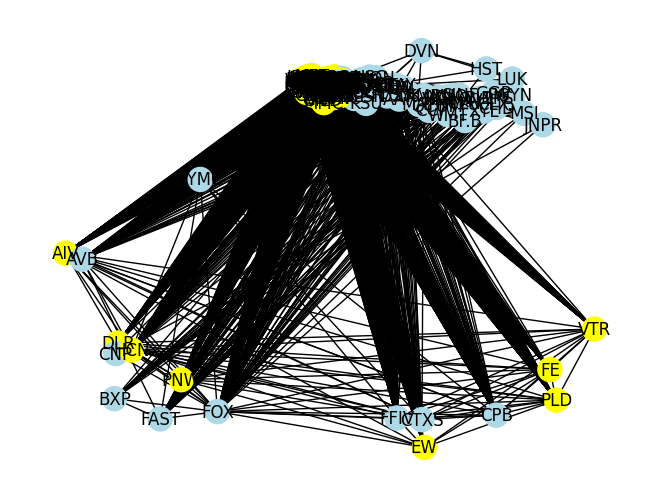

In [60]:
# Create a color map to differentiate communities
color_map = {}
for i, sub_community in enumerate(sub_communities2):
    for node in sub_community:
        color_map[node] = i

# Define colors for yellow and light blue
colors = ['#FFFF00', '#ADD8E6']  # Yellow and Light Blue

# Plot the graph with different node colors
pos = nx.spring_layout(subgraph2)  # You can choose a different layout if preferred
node_colors = [colors[color_map.get(node, len(sub_communities2))] for node in subgraph2.nodes()]
nx.draw(subgraph2, pos, node_color=node_colors, with_labels=True)

# Show the plot
plt.show()